**UFPB - PPGI** <br>
**Teoria da Computação** <br>
**Prof. Bruno Bruck** <br>
**Aluno Gabriel Medeiros do Nascimento**


### Setup -> input.txt
Basta rodar as células abaixo, adaptando o nome do arquivo de entrada. <br>
Para fazer upload do arquivo, usar menu à esquerda.

In [37]:
import pandas as pd
import numpy as np

import graphviz

import random

In [83]:
with open('/content/input.txt', 'r') as f:
  linhas = f.readlines()
  alfabeto = linhas[0][:-1].split('=')[1].split(',')
  inicial = linhas[2][:-1].split('=')[1]
  estados = linhas[1][:-1].split('=')[1].split(',')
  finais = linhas[3][:-1].split('=')[1].split(',')

  afn_transicoes = []
  for transicoes in range(len(linhas[5:-1])):
      afn_transicoes.append(linhas[5:][transicoes][:-1].split(','))

  afn_transicoes.append(linhas[-1].split(','))

df_transicoes = pd.DataFrame(afn_transicoes, columns=['de', 'para', 'simbolo_transicao'])

### Classe e função do AFN

In [43]:
class Estado_AFN_CLASS:
    def __init__(self, nome, etapa, graf):
        self.nome  = nome
        self.etapa = nome + '_' + str(etapa)
        self.node = graf.node(self.etapa, self.nome)

In [81]:
def processar_afn(cadeia):

  #Instanciar objeto graph
  arvore_processamento_AFN = graphviz.Digraph()
  
  #Iterador explícito
  i = 1

  # Iniciar objeto-lista de estados com a classe Estado_AFN_CLASS
  # Nesse caso, recebe-se apenas o estado inicial
  estados_atuais = [Estado_AFN_CLASS(inicial, i-1, arvore_processamento_AFN)]

  for simbolo in cadeia:
      estados_proximos = []
      for estado in estados_atuais:
          transicoes_possiveis = df_transicoes.query("(de == @estado.nome) & (simbolo_transicao == @simbolo)")

              #'Se não houver transição possível, dispara o crash'
          if len(transicoes_possiveis) == 0:
              tag_de_erro = 'Crash' + str(random.random())
              arvore_processamento_AFN.node(tag_de_erro, 'Crash',  shape='underline', fontcolor='firebrick')
              arvore_processamento_AFN.edge(estado.etapa, tag_de_erro, label=simbolo)

              #'Se houver transição possível, itera nas possibilidades'
              #'Salva as possibilidades nos estados próximos'

          else:
              for estado_possivel in transicoes_possiveis['para']:
                  proximo_estado = Estado_AFN_CLASS(estado_possivel, i, arvore_processamento_AFN)
                  arvore_processamento_AFN.edge(estado.etapa, proximo_estado.etapa, label=simbolo)
                  estados_proximos.append(proximo_estado)
                  #'Havendo transições epsilon + havendo consumido a cadeia:'
                  #'processa transição vazia e salva nos estados próximos'
                  
                  transicoes_epsilon = df_transicoes.query("(de == @estado_possivel) & (simbolo_transicao == 'epsilon')")

                  if len(transicoes_epsilon) > 0:
                      for transicao_vazia in transicoes_epsilon['para']:
                          destino_com_epsilon = Estado_AFN_CLASS(transicao_vazia, i+1, arvore_processamento_AFN) 
                          arvore_processamento_AFN.edge(proximo_estado.etapa, destino_com_epsilon.etapa, label='epsilon')


                          #Abaixo evita crash:
                          if destino_com_epsilon.nome == proximo_estado.nome: 
                              arvore_processamento_AFN.edge(destino_com_epsilon.etapa, proximo_estado.etapa, label='loop')
                          else:
                            estados_proximos.append(destino_com_epsilon)

      
      #Fim do loop: Atualizar estados atuais
      #Avançar a iteração
      estados_atuais = estados_proximos
      i+=1
          
  
  for estado in estados_proximos:
      #'Hipótese de último estado processado estar nos estados finais'
      if estado.nome in finais:
          tag_final = 'OK_' + str(random.random())
          arvore_processamento_AFN.node(tag_final, 'Aceito!', shape='doublecircle', fontcolor='forestgreen')
          arvore_processamento_AFN.edge(estado.etapa, tag_final)

      #'Hipótese de último estado processado não estar nos estados finais'
      else:
          tag_de_erro = 'Rejeito_' + str(random.random())
          arvore_processamento_AFN.node(tag_de_erro, 'Rejeito',  shape='underline', fontcolor='firebrick')
          arvore_processamento_AFN.edge(estado.etapa, tag_de_erro, label=simbolo)
  

  #Prints
  print('\n\n\nEis o resultado, professor: \n')
  print(f'Estado_AFN_CLASS inicial = ', inicial)
  print(f'Estados finais = ', finais)
  print(f'Alfabeto = ', alfabeto)
  print('\n')
  print('Árvore de processamento: \n')

  #Retorno do objeto final
  return arvore_processamento_AFN

### Acionamento da função do AFN
Basta rodar a célula abaixo e digitar a cadeia desejada.

Sua cadeia --> 1010101



Eis o resultado, professor: 

Estado_AFN_CLASS inicial =  q0
Estados finais =  ['q2']
Alfabeto =  ['0', '1']


Árvore de processamento: 



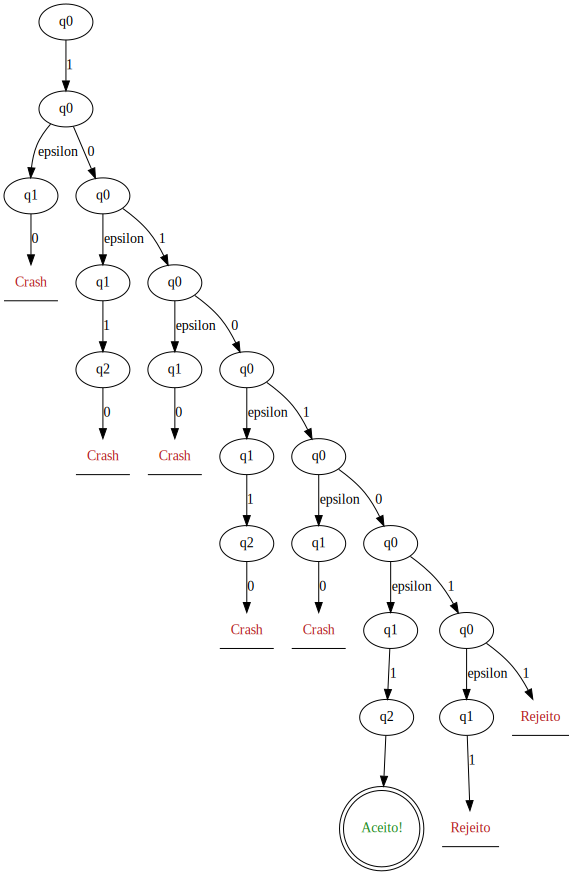

In [84]:
processar_afn(input('Sua cadeia --> '))